To start; import the folowing things:

In [116]:
#Setting up the modules to study the experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data of the experiment
data = pd.read_csv('data.csv')
data.head()

,time,boid,speed,x,y,z
0,0,0,0.005,0.183441,0.683929,0
1,0,1,0.005,0.005951,0.648743,0
2,0,2,0.005,0.335938,0.988190,0
3,0,3,0.005,0.426239,0.194042,0
4,0,4,0.005,0.227417,0.225098,0


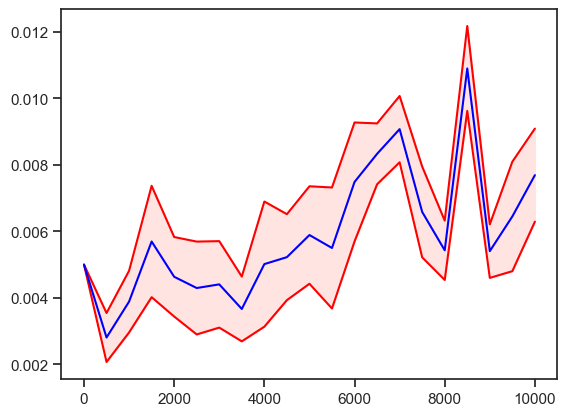

In [117]:
δ = 1.

S = data[["time","speed"]].groupby("time").mean().reset_index().to_numpy()
t = S[:,0]
S = S[:,1]
ΔS= data[["time","speed"]].groupby("time").std( ).to_numpy()[:,0]
S_p = S + δ * ΔS
S_m = S - δ * ΔS


plt.fill_between(t, S_p, S_m, color="mistyrose")
plt.plot(t,S_p, "red")
plt.plot(t,S_m, "red")
plt.plot(t,S, "blue")

Text(0.5, 0, 'speed')

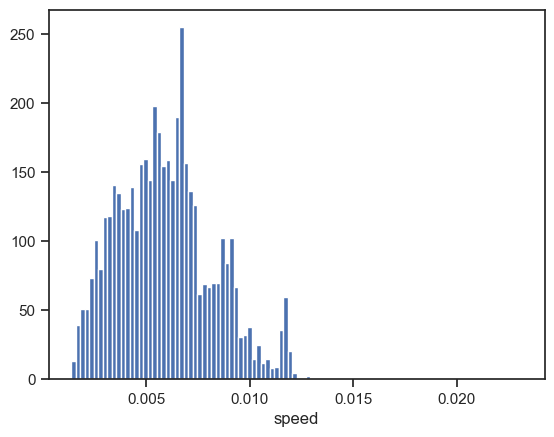

In [120]:
#d=data[data.time!=0].speed.hist(bins=100)
plt.hist(data.speed[data.time !=0],bins=100,density=True,range=(np.min(data.speed), np.max(data.speed)))
plt.xlabel("speed")
#trace la distribution de vitesse moyennée sur l'acquisition

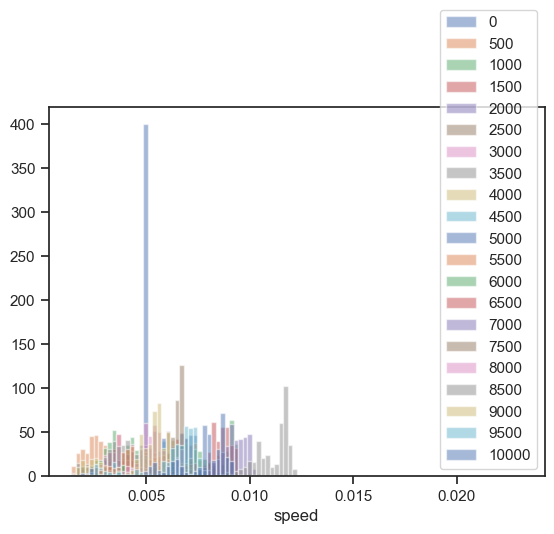

In [119]:
#trace la distrib de vitesse à chaque temps.
for time in data.time.unique():
    plt.hist(data.speed[data.time == time],alpha=0.5,bins=100,density=False,label=time,range=(np.min(data.speed), np.max(data.speed)))
    plt.xlabel("speed")
    plt.legend()



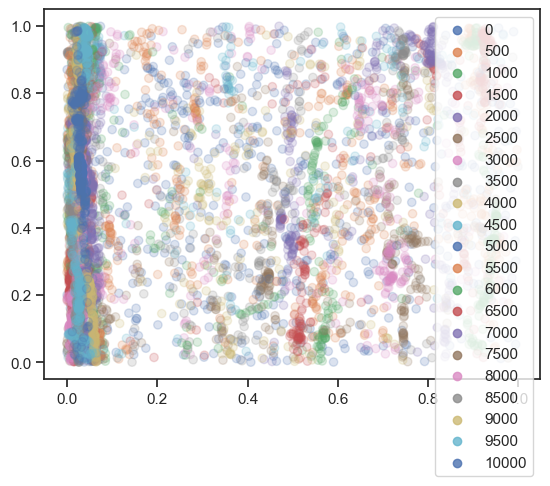

In [165]:
#plot la position de chaque oiseau à chaque temps : une couleur= un temps
import numpy as np
df = pd.read_csv("data.csv")
for i, time in enumerate(df.time.unique()):
    df.loc[df.time == time, "colors"] = f"C{i}"
    
plt.scatter(df.x, df.y, c=df["colors"], alpha=0.2)
for i, time in enumerate(df.time.unique()):
    plt.scatter([], [], c="C{}".format(i), alpha=0.8, label=time)
plt.legend();    
    

    
    
    




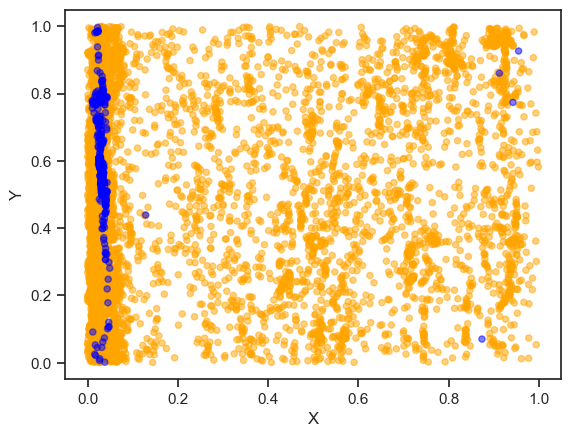

In [163]:
    colors = np.where(df.time == time, "blue","orange")
axs[0] =df.plot.scatter(
    x="x",
    y="y",
    c=colors,
    alpha=0.5,
    loglog=False,
    xlabel="X",
    ylabel="Y",)

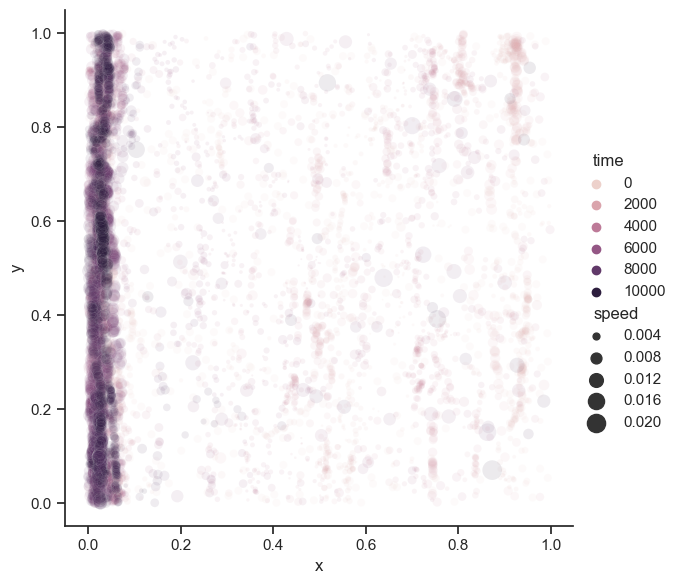

In [122]:
#plot la position de chaque oiseau à chaque temps : une couleur= un temps et la taille correspond à la vitesse de l'oiseau
import seaborn as sns

sns.set_theme(style="ticks")

DT = pd.read_csv("data.csv")

g = sns.relplot(
    data=DT,
    x="x",
    y="y",
    hue="time",
    size="speed",
    alpha=0.09,
    sizes=(0, 200),
    height=6,
)
g.set(xlabel="x", ylabel="y");